# Information Retrieval and Web Analytics

# Indexing + Modeling (TF-IDF)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Welcome to the first hands-on session of Information Retrieval and Web Analytics!

In this exercise you will implement a simple search engine to query a sample of Wikipedia articles. You will be provided with a sample of 500 Wikipedia articles in text format (some preprocessing has already been done to remove html tags).

For each article you have the following features:

- article id
- article title
- article body

This session is composed by three main parts:

1. **Create the index by going through the documents**
2. **Query the index to obtain a set of documents**
3. **Add some ranking to obtain a sorted set of documents when querying the index**



## 1. Create the index
The index is implemented through an **Inverted Index** which is the main data structure of our search engine. It maps the terms of our corpus (the collection of documents) to the documents that those terms appear in.

You will implement the index through a Python dictionary, and then you will use it to return the list of documents relevant for a query.

Each **vocabulary term** is a key in the index whose value is the list of documents that the term appears in.

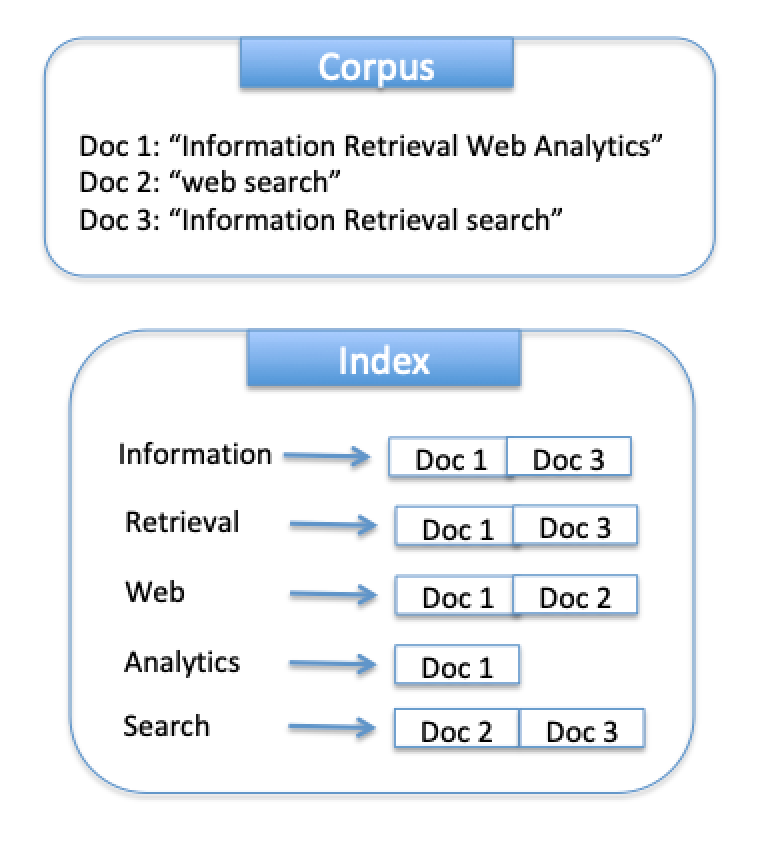
<caption><center> <u> <font color=''> Figure 1 </u><font color=''>  : Example of an inverted index</center></caption>
    
*Figure 1* shows a basic implementation of an inverted index. However, there exists a special type of queries, named **Phrase Queries**, where the position of the terms in the document matters. Phrase Queries are those queries typed inside double quotes when we want the matching documents to contain the terms in the query exactly in the specified order.
    
In order to work with Phrase Queries we need to add some information in the inverted index. The new inverted index will store, for each term, the list of documents containing the term and the positions of the term in the corresponding document.

See *Figure 2*:
    
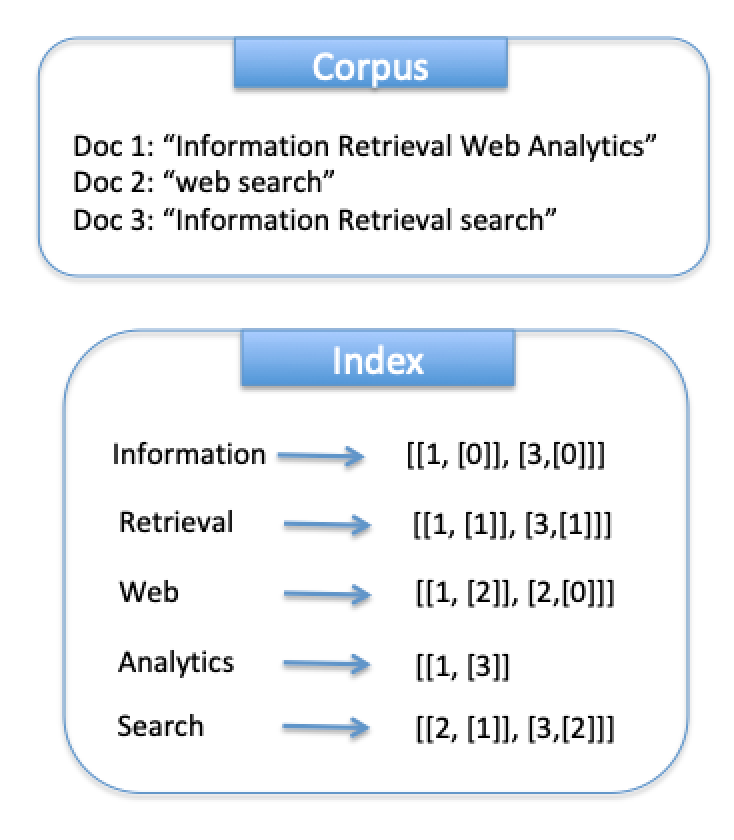
<caption><center> <u> <font color=''> Figure 2 </u><font color=''>  : Example of an inverted index with term's position information </center></caption>


In the above example the term *Information* appears in document 1 at positions 0 (we start counting positions from 0), and in document 3 at position 0.
    
Notice that when implementing the index, you will need to perform some preprocessing:
    
    - Transform all words to lower case ( we don’t want to index *Information*, *information*, and *INFORMATION* differently.)
    - Remove stop words ( very common words like articles, etc.)
    - Apply Stemming (remove common endings from words. For example the stemmed version of the words fish, fishes, fishing, fisher, fished is the word 'fish')
    
But do not worry about that, we will provide you with simple tools to do it!

### Index implementation
To create the index you will perform the following steps:
- Loop over all documents of the collection provided in the dataset found in the project file `inputs/documents-corpus.tsv`.
- Concatenate the title and the text of the page.
- Lowercase all words.
- Get tokens (transform the string title+body into a list of terms)
- Remove stop words
- Stem each token
- Build the index following the model of Figure 2.

#### Load Python packages
Let's first import all the packages that you will need during this assignment.

In [ ]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import time

#### Load data into memory
The dataset is stored in the TSV file, and it contains 500 Wikipedia articles (one article per line). For each article we have the document id, document title and document body separated by "|" character.

In [ ]:
docs_path = 'data/documents-corpus.tsv'
with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]

In [ ]:
print("Total number of Wikipedia articles in the corpus: {}".format(len(lines)))

Implement the function ```build_terms(line)```.

It takes as input a text and performs the following operations:

- Transform all text to lowercase
- Tokenize the text to get a list of terms (use *split function*)
- Remove stop words
- Stem terms (example: to stem the term 'researcher', you will use ```stemmer.stem(researcher)```)

In [ ]:
def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    ## START CODE
    line=  """YOUR CODE HERE""" ## Transform in lowercase
    line=  """YOUR CODE HERE""" ## Tokenize the text to get a list of terms
    line=["""YOUR CODE HERE"""]  ##eliminate the stopwords (HINT: use List Comprehension)
    line=["""YOUR CODE HERE"""] ## perform stemming (HINT: use List Comprehension)
    ## END CODE
    return line

In [ ]:
def create_index(lines):
    """
    Implement the inverted index

    Argument:
    lines -- collection of Wikipedia articles

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)
    title_index = {}  # dictionary to map page titles to page ids
    for line in lines:  # Remember, lines contain all documents: article-id | article-title | article-body
        line_arr = line.split("|")
        page_id = int(line_arr[0])
        terms = build_terms(''.join(line_arr[1:])) # page_title + page_text
        title = line_arr[1]
        title_index[page_id]=title  ## we do not need to apply get terms to title because it used only to print titles and not in the index

        ## ===============================================================
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms): # terms contains page_title + page_text. Loop over all terms
            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list

        ## START CODE
                current_page_index["""YOUR CODE HERE"""]["""YOUR CODE HERE"""].append("""YOUR CODE HERE""")
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index["""YOUR CODE HERE"""]=["""YOUR CODE HERE""", array('I',["""YOUR CODE HERE"""])] #'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append("""YOUR CODE HERE""")

        ## END CODE

    return index, title_index

In [ ]:
start_time = time.time()
index, title_index = create_index(lines)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time, 2)))

Notice that if you look in the index for ```researcher```you will not find any result, while if you look for ```research``` you will get some results. That happens because we are storing in the index stemmed terms.

In [ ]:
print("Index results for the term 'researcher': {}\n".format(index['researcher']))
print("First 10 Index results for the term 'research': \n{}".format(index['research'][:10]))

## 2. Querying the Index

Even if before we mentioned that in case of phrase queries we need to take into account the position of the terms in the document and we have implemented an index that would allow us to also work with this type of queries, here you are going to implement a search function that will query the index without take into account the terms' positions.


We will use english Free Text Queries, that means that the query we will query the index using  a sequence of english words as query, and the output will be the list of documents that contain any of the query terms.

For instance if we write the query **"computer science"** the output will be the union of all documents containing the term "computer" with all documents containing the term "science".

In [ ]:
def search(query, index):
    """
    The output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
    ## START DODE
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=["""YOUR CODE HERE""" for posting in index["""YOUR CODE HERE"""]]
            # docs = docs Union term_docs
            docs = """YOUR CODE HERE"""
        except:
            #term is not in index
            pass
    docs = list(docs)
    return docs

In [ ]:
print("Insert your query (i.e.: Computer Science):\n")
query = input()
docs = search(query, index)
top = 10

print("\n======================\nSample of {} results out of {} for the searched query:\n".format(top, len(docs)))
for d_id in docs[:top]:
    print("page_id= {} - page_title: {}".format(d_id, title_index[d_id]))

Results for ```Computer Science``` query

======================
Sample of 10 results out of 345 for the seached query:

- page_id= 1029 - page_title: Adjoint state method
- page_id= 2059 - page_title: Apache Cassandra
- page_id= 1036 - page_title: Adminer
- page_id= 3089 - page_title: BCSWomen
- page_id= 1043 - page_title: Admissible heuristic
- page_id= 1046 - page_title: Admon
- page_id= 26 - page_title: 12th Computer Olympiad
- page_id= 3103 - page_title: BESM
- page_id= 33 - page_title: 18 bit
- page_id= 1059 - page_title: Adobe Flash

## 3. Add Ranking with TF-IDF

When searching in a search engine, we are interested in obtain the results sorted by relevance or by some other criteria. Notice that **the above results are not ranked**.

Here you are going to implement the **TF-IDF (Term Frequency — Inverse Document Frequency)** mechanism and use it to obtain a list of ordered results.

TF-IDF is a weighting scheme that assigns each term in a document a weight based on its term frequency (FT) and the inverse document frequency (IDF).  The higher the scores, more important the term is.

##### TF
**TF** refers to the frequency of a term $t$ in a specific document $d$. The basic idea is that as a term appears more in the document it becomes more important. On the other side, if we only use pure term counts, longer documents will be favored more. Consider two documents with exactly the same content but one being twice longer by concatenating with itself.  The tf weights of each word in the longer document will be twice the shorter one, although they essentially have the same content. To deal with this issue we need to **normalize the term frequencies**.


$$tf_{t,d} = \dfrac{N_{t,d}}{||D||}\tag{1}$$


where ||D|| is the Euclidean norm.


Let $D=[t_1, t_2, \dots, t_n]$ be the document vector where $t_i$ represent the frequency of the term $i$, the  Euclidean Norm is calculated as


$$\sqrt{\sum_{t=1}^{n}t_i{^2}}\tag{2}$$


Note that $||D||$ is the same for all terms of a document.


##### IDF
A drawback of tf is that it considers all terms equally important. However, less common terms are more discriminative than others. To deal with this issue we introduce **idf (inverse document frequency)** that takes into account the number of documents containing the term.

$$idf_t = log\dfrac{N}{df_t}\tag{3}$$

where:

- $N$ is the total number of documents;
- $df_t$ is the number of documents containing the term $t$.

The log operation is applied to avoid that terms that appears in a high number of documents are considered to be too much less important, in this way we are smoothing (dampening) this difference.


In [ ]:
def create_index_tfidf(lines, num_documents):
    """
    Implement the inverted index and compute tf, df and idf

    Argument:
    lines -- collection of Wikipedia articles
    num_documents -- total number of documents

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  # term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  # document frequencies of terms in the corpus
    title_index = defaultdict(str)
    idf = defaultdict(float)

    for line in lines:
        line_arr = line.split("|")
        page_id = int(line_arr[0])
        terms = build_terms(''.join(line_arr[1:]))  # page_title + page_text
        title = line_arr[1]
        title_index[page_id] = title

        ## ===============================================================
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index["""YOUR CODE HERE"""]["""YOUR CODE HERE"""].append("""YOUR CODE HERE""")
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index["""YOUR CODE HERE"""]=["""YOUR CODE HERE""", array('I',["""YOUR CODE HERE"""])] #'I' indicates unsigned int (int in Python)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len("""YOUR CODE HERE""") ** 2
        norm = math.sqrt(norm)

        # calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len("""YOUR CODE HERE""")/"""YOUR CODE HERE""",4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] = """YOUR CODE HERE""" # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

    # Compute IDF following the formula (3) above. HINT: use np.log
    # Note: It is computed later after we know the df.
    for term in df:
        idf[term] = np.round("""YOUR CODE HERE"""(float("""YOUR CODE HERE"""/"""YOUR CODE HERE""")), 4)

    return index, tf, df, idf, title_index


In [ ]:
start_time = time.time()
num_documents = len(lines)
index, tf, df, idf, title_index = create_index_tfidf(lines, num_documents)
print("Total time to create the index: {} seconds" .format(np.round(time.time() - start_time, 2)))

In [ ]:

def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]="""YOUR CODE HERE"""/"""YOUR CODE HERE""" * """YOUR CODE HERE""" #query_vector[0] corresponds to the first term in the query

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs: #if the odcument is in the list of documents retrieved (matching the query)
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores=[["""YOUR CODE HERE"""(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [ ]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=["""YOUR CODE HERE""" for posting in index["""YOUR CODE HERE"""]]

            # docs = docs Union term_docs
            docs = """YOUR CODE HERE"""
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs = rank_documents(query, docs, index, idf, tf, title_index)
    return ranked_docs

In [ ]:
print("Insert your query (i.e.: Computer Science):\n")
query = input()
ranked_docs = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top]:
    print("page_id= {} - page_title: {}".format(d_id, title_index[d_id]))